#### Naive Bayes

In [9]:
import os
import re
import json
import gzip
import wget
import pandas as pd
import numpy as np
from urllib.request import urlopen
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import time
import nltk
from imp import reload

#cleaning textfiles libraries
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords

In [10]:
##download data from url
### randomly selected file to model
#url = 'https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Grocery_and_Gourmet_Food_5.json.gz'
#filename = wget.download(url)


# read JSON string from file and convert to dataframe
#df = pd.read_json('C:/Users/Triston/OneDrive/Documents/DS6120 Capstone A/Grocery_and_Gourmet_Food_5-CLEAN.json', compression='gzip')

In [11]:
#load metadata
data = []
with gzip.open('C:/Users/Triston/OneDrive/Documents/DS6120 Capstone A/Grocery_and_Gourmet_Food_5-INITIAL.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

1143860
{'overall': 5.0, 'verified': True, 'reviewTime': '11 19, 2014', 'reviewerID': 'A1QVBUH9E1V6I8', 'asin': '4639725183', 'reviewerName': 'Jamshed Mathur', 'reviewText': 'No adverse comment.', 'unixReviewTime': 1416355200, 'vote': 0.0, 'helpful_flag': 0, 'totalWords': 3, 'vocab_size': 3, 'char_counts': 17, 'avg_word_size': 5.6666666667, 'stopword_count': 0, 'numeric_count': 0, 'UpperCase_word_count': 0, 'Capitalized_word_count': 1, 'Nouns_count': 1, 'Verbs_count': 0, 'Adj_count': 1, 'Adverbs_count': 0, 'Conj_count': 0}


In [12]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

1143860


In [13]:
#look at dataframe
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143860 entries, 0 to 1143859
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   overall                 1143860 non-null  float64
 1   verified                1143860 non-null  bool   
 2   reviewTime              1143860 non-null  object 
 3   reviewerID              1143860 non-null  object 
 4   asin                    1143860 non-null  object 
 5   reviewerName            1143722 non-null  object 
 6   reviewText              1143860 non-null  object 
 7   unixReviewTime          1143860 non-null  int64  
 8   vote                    1143860 non-null  float64
 9   helpful_flag            1143860 non-null  int64  
 10  totalWords              1143860 non-null  int64  
 11  vocab_size              1143860 non-null  int64  
 12  char_counts             1143860 non-null  int64  
 13  avg_word_size           1143860 non-null  float64
 14  st

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,unixReviewTime,vote,helpful_flag,...,avg_word_size,stopword_count,numeric_count,UpperCase_word_count,Capitalized_word_count,Nouns_count,Verbs_count,Adj_count,Adverbs_count,Conj_count
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,1416355200,0.0,0,...,5.666667,0,0,0,1,1,0,1,0,0
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,1476316800,0.0,0,...,5.500000,1,0,0,1,3,0,0,0,1
2,5.0,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",1448064000,0.0,0,...,3.526316,8,0,0,2,1,3,3,2,4
3,5.0,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,1439337600,0.0,0,...,4.611111,5,0,0,4,7,2,2,1,2
4,5.0,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,1432771200,0.0,0,...,4.461538,13,0,4,8,5,10,5,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143855,5.0,True,"09 8, 2017",A223YRQH2Z5T1D,B01HJF6FRA,flint5292,"As a new vegan, it is sometimes difficult to r...",1504828800,4.0,1,...,4.392405,29,0,2,9,20,15,11,6,10
1143856,5.0,True,"08 4, 2017",A38GDA4TB9EILT,B01HJF6FRA,Moriah Bolyard,The best thing ever is ordering a product you ...,1501804800,3.0,1,...,4.377778,17,0,3,8,16,8,2,3,6
1143857,5.0,True,"07 4, 2017",A2025PN7HDC5BO,B01HJF6FRA,M.C,I used to love ranch before I became vegan. It...,1499126400,5.0,1,...,4.600000,70,0,8,19,49,36,14,10,30
1143858,5.0,True,"06 7, 2017",A1NY7XWC7EPQOA,B01HJF6FRA,Greensboro,I cannot have dairy nor gluten. This is as cl...,1496793600,2.0,1,...,3.375000,13,0,2,4,1,8,3,2,4


In [14]:
#convert column to string
df["reviewText"]=df["reviewText"].astype(str)

In [15]:
#Determine Average Review Length and add review length column to dataframe

x = [len(df['reviewText'][i]) for i in range(df['reviewText'].shape[0])]
print('average length of review: {:.3f}'.format(sum(x)/len(x)) )

average length of review: 208.585


### Create a balanced data set

In [16]:
# creating helpful dataset
df_helpful = df[df['helpful_flag']==1]
df_helpful.shape

(158202, 23)

In [17]:
# creating nonhelpful dataset 
df_nothelpful = df[df['helpful_flag']==0]
df_nothelpful.shape

(985658, 23)

In [18]:
#downsampling nonhelpful
df_nothelpful_downsampled = df_nothelpful.sample(df_helpful.shape[0])
df_nothelpful_downsampled.shape

(158202, 23)

In [19]:
# combining for balanced data set

dfbalanced = pd.concat([df_nothelpful_downsampled, df_helpful])
dfbalanced.shape

(316404, 23)

In [20]:
#sample from unbalnaced initial dataset
dfunbal = df.sample(n = 20000, random_state = 1)

#sample from balanced dataset
dfbal = dfbalanced.sample(n = 20000, random_state = 1)

### Naive Bayes

In [21]:
#Import Naive Bayes

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

In [33]:
dfNB = dfunbal[['overall', 'reviewText', 'vote', 'totalWords', 'helpful_flag', 'totalWords', 'vocab_size', 'char_counts', 'avg_word_size', 'stopword_count', 'numeric_count', 'UpperCase_word_count', 'Capitalized_word_count', 'Nouns_count', 'Verbs_count', 'Adj_count', 'Adverbs_count', 'Conj_count']]
dfNB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 758448 to 278644
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   overall                 20000 non-null  float64
 1   reviewText              20000 non-null  object 
 2   vote                    20000 non-null  float64
 3   totalWords              20000 non-null  int64  
 4   helpful_flag            20000 non-null  int64  
 5   totalWords              20000 non-null  int64  
 6   vocab_size              20000 non-null  int64  
 7   char_counts             20000 non-null  int64  
 8   avg_word_size           20000 non-null  float64
 9   stopword_count          20000 non-null  int64  
 10  numeric_count           20000 non-null  int64  
 11  UpperCase_word_count    20000 non-null  int64  
 12  Capitalized_word_count  20000 non-null  int64  
 13  Nouns_count             20000 non-null  int64  
 14  Verbs_count             20000 no

In [34]:
#Create Train-Test Split

#https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830

from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(dfNB, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 16000
No. of testing examples: 4000


In [35]:
the_count = TfidfVectorizer()

Xtrain = the_count.fit_transform(training_data['reviewText'])

In [36]:
Xtrain = Xtrain.toarray()

reverse = {j:i for i,j in the_count.vocabulary_.items()}

In [37]:
#Fit Multinomial Naive Bayes model for initial dataframe sample
nb = MultinomialNB()
nb.fit(Xtrain, training_data['helpful_flag'])

MultinomialNB()

In [38]:
Xtest = the_count.transform(testing_data['reviewText'])
preds = nb.predict(Xtest.toarray())
preds.shape

(4000,)

In [39]:
print(classification_report(testing_data['helpful_flag'],preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3414
           1       0.00      0.00      0.00       586

    accuracy                           0.85      4000
   macro avg       0.43      0.50      0.46      4000
weighted avg       0.73      0.85      0.79      4000



C:\Users\Triston\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Triston\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Triston\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.p

In [40]:
# plot the confusion matrix

cnf_matrix = confusion_matrix(testing_data['helpful_flag'],preds)

print(cnf_matrix)

[[3414    0]
 [ 586    0]]


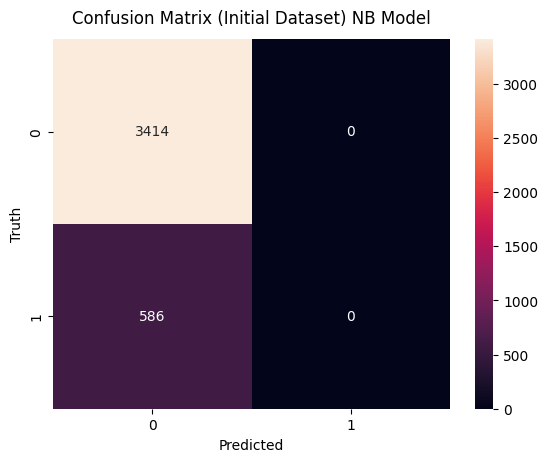

In [41]:
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix (Initial Dataset) NB Model", y=1.02);